# Types of Autoencoder
1. Vanilla Autoencoder
2. Multilayer Autoencoder
3. Convolutional Autoencoder
4. Denoise Autoencoder-Remove noise from image

In [93]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


In [94]:
# Load mnist data
(x_train,_),(x_test,_)=mnist.load_data()

In [95]:
x_train.shape

(60000, 28, 28)

In [96]:
x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.

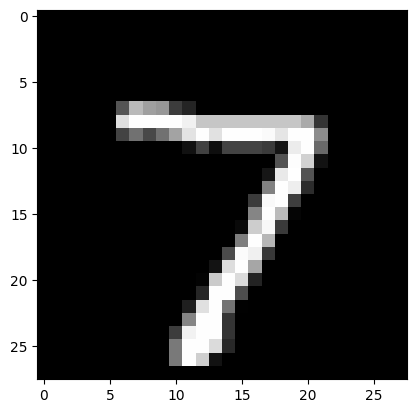

In [97]:
plt.imshow(x_test[0],cmap='gray')

In [98]:
# reshape x_train and x_test
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

# 1. Vanilla Autoencoder

In [99]:
#parameters
input_size=784
hidden_size=8
output_size=784

In [100]:
from tensorflow.keras.layers import Input

# Functional Keras API
x=Input(shape=(input_size,))
h=Dense(hidden_size,activation='relu')(x)
r=Dense(output_size, activation='sigmoid')(h)

In [101]:
autoencoder=Model(inputs=x,outputs=r)

In [102]:
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 8)                 6280      
                                                                 
 dense_9 (Dense)             (None, 784)               7056      
                                                                 
Total params: 13,336
Trainable params: 13,336
Non-trainable params: 0
_________________________________________________________________


In [103]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# Plot the model
plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [104]:
autoencoder.compile(optimizer='adam',loss='mse')

In [105]:
epochs=5
batch_size=128
history=autoencoder.fit(x_train,x_train,batch_size=batch_size,epochs=epochs,
                        validation_data=(x_test,x_test))

Epoch 1/5
469/469 [==============================] - 5s 6ms/step - loss: 0.0736 - val_loss: 0.0487
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0440 - val_loss: 0.0405
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0395 - val_loss: 0.0381
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0379 - val_loss: 0.0370
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0370 - val_loss: 0.0362


In [119]:
# predict on test images
decoded_img=autoencoder.predict(x_test)

313/313 [==============================] - 0s 835us/step


In [117]:
def display_images(n, x_test, decoded_img):
    """
    Display original and reconstructed images side by side.

    Parameters:
    - n (int): Number of images to display.
    - x_test (numpy.ndarray): Array of original images.
    - decoded_img (numpy.ndarray): Array of reconstructed images.

    Returns:
    None
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(20,6))
    for i in range(n):
        # display original
        ax=plt.subplot(3,n,i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax=plt.subplot(3,n,i+n+1)
        plt.imshow(decoded_img[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


In [108]:
autoencoder.evaluate(x_test,x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0362


0.036245763301849365

## Multilayer Autoencoder

In [110]:
# parametres
input_size = 784
hidden_size = 128
code_size=64

# Encoder
x=Input(shape=(input_size,))
hidden_1=Dense(hidden_size,activation='relu')(x)

code=Dense(code_size,activation='relu')(hidden_1)

# Decoder
hidden_2=Dense(hidden_size,activation='relu')(code)
r=Dense(input_size,activation='sigmoid')(hidden_2)

autoencoder1=Model(inputs=x,outputs=r)


In [111]:
autoencoder1.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [112]:
autoencoder1.compile(optimizer='adam',loss='mse')

In [113]:
epochs=5
batch_size = 128
autoencoder1.fit(x_train,x_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(x_test,x_test))

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0411 - val_loss: 0.0187
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0156 - val_loss: 0.0127
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0118 - val_loss: 0.0107
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0089 - val_loss: 0.0083


In [114]:
autoencoder1.evaluate(x_test,x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0083


0.008270730264484882

In [115]:
# predict on test images
decoded_img=autoencoder1.predict(x_test)

313/313 [==============================] - 0s 1ms/step


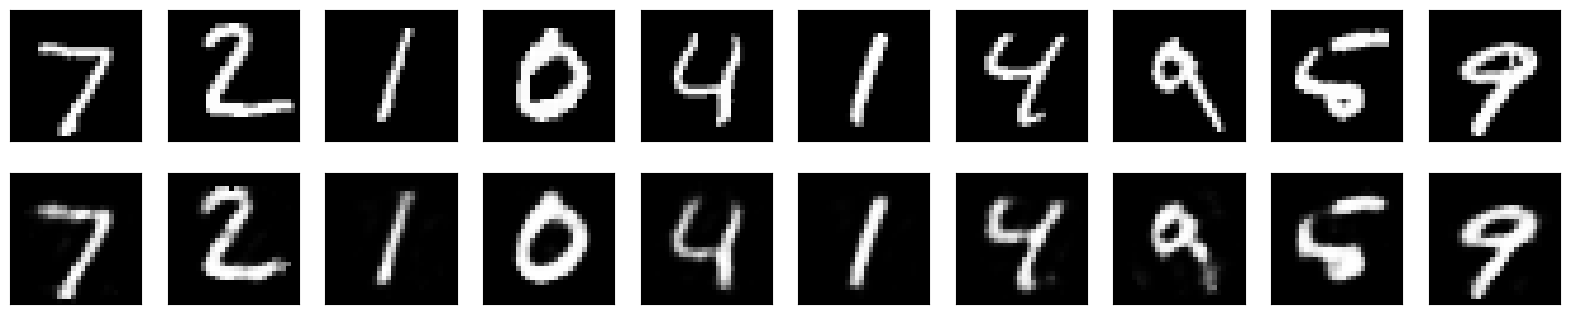

In [118]:
display_images(10,x_test,decoded_img=decoded_img)

## Denoising Autoencoder

In [121]:
# Computer vision
# OpenCV2

In [122]:
# Set the noise factor
noise_factor = 0.2

# Add random noise to the training data
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)

# Add random noise to the test data
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


In [ ]:
# clip 
x_train_noisy=np.clip(x_train_noisy,0.,1.)
x_test_noisy=np.clip(x_test_noisy,0.,1.)

In [123]:
x_train_noisy.shape

(60000, 784)

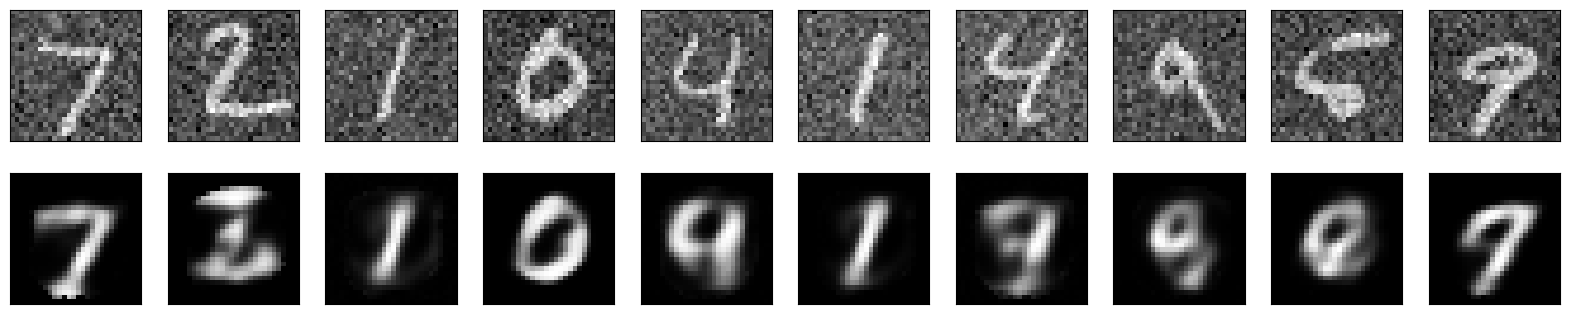

In [125]:
display_images(10,x_test_noisy,decoded_img=decoded_img)

In [126]:
# create the model
from tensorflow.keras.models import Sequential

In [129]:
# Create the model
model=Sequential()
model.add(Dense(500,input_dim=784,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(784,activation='sigmoid'))

In [130]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 500)               392500    
                                                                 
 dense_24 (Dense)            (None, 300)               150300    
                                                                 
 dense_25 (Dense)            (None, 100)               30100     
                                                                 
 dense_26 (Dense)            (None, 300)               30300     
                                                                 
 dense_27 (Dense)            (None, 500)               150500    
                                                                 
 dense_28 (Dense)            (None, 784)               392784    
                                                                 
Total params: 1,146,484
Trainable params: 1,146,484
No

In [131]:
model.compile(optimizer='adam',loss='mse')

In [132]:
history=model.fit(x_train_noisy,x_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_noisy,x_test))

Epoch 1/5
469/469 [==============================] - 9s 15ms/step - loss: 0.0322 - val_loss: 0.0157
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0134 - val_loss: 0.0113
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0106 - val_loss: 0.0096
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0092 - val_loss: 0.0089
Epoch 5/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0083 - val_loss: 0.0083


In [133]:
decoded_imgs=model.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


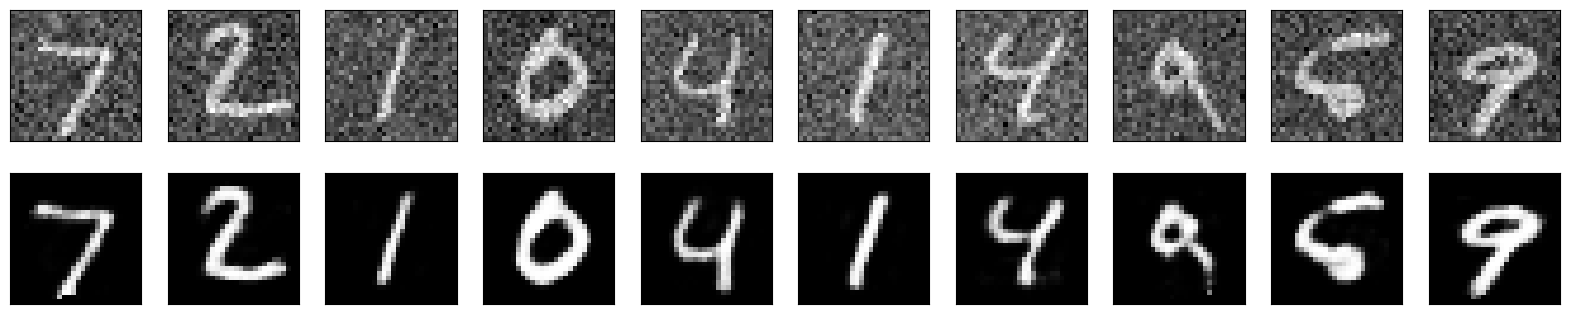

In [135]:
display_images(10,decoded_img=decoded_imgs,x_test=x_test_noisy)

In [136]:
model.evaluate(x_test,x_test_noisy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0464


0.04643797129392624

# Convolutional Autoencoder

In [140]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [146]:
x_train.shape

(60000, 28, 28, 1)

In [147]:
x_train=x_train.astype('float')/255.0
x_test=x_test.astype('float')/255.0

In [151]:
# import upsampling

from tensorflow.keras.layers import UpSampling2D

In [ ]:
# Create model
# Input layer (784)
# CNN2D 16ker, 3x3, relu
# maxpool2d
# Cnn2d 32 ker 2 X 2, relu
# upsample2d
# CNN2D 32 ker 2 x 2, relu
# upsample2d
# CNN2d 16 ker, 3 x 3, relu
# CNN2d



In [155]:
x = Input(shape=(28,28,1))

#Encoder
conv1_1=Conv2D(16,(3,3),activation='relu',padding='same')(x)
pool1=MaxPooling2D((2,2),padding='same')(conv1_1)
conv1_2=Conv2D(8,(3,3),activation='relu',padding='same')(pool1)
pool2=MaxPooling2D((2,2),padding='same')(conv1_2)

conv1_3=Conv2D(8,(3,3),activation='relu',padding='same')(pool2)
pool3=MaxPooling2D((2,2),padding='same')(conv1_3)

#decoder



(1, 4, 4, 1)